In [1]:
import numpy as np
import pandas as pd
import scipy.special as sp
import matplotlib.pyplot as plt
import healpy as hp
import scipy.constants as const
import scipy.optimize as op
import scipy.integrate as integrate
import matplotlib as mpl

In [2]:
plt.rcdefaults()
fontsize = 14
from matplotlib import font_manager
from matplotlib import rcParams
from matplotlib import rc

cmfont = font_manager.FontProperties(fname=mpl.get_data_path() + '/fonts/ttf/cmr10.ttf')
plt.rcParams['font.serif']=cmfont.get_name()
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "font.size" : fontsize,
          "text.usetex" : True,
          "mathtext.fontset" : "cm",
          "font.family" : "serif",
          "font.serif" : [cmfont.get_name()],
          "text.latex.preamble" : r"\usepackage{amsmath}"}
plt.rcParams['axes.unicode_minus']=False
plt.rcParams.update(params)

In [3]:
def m_enclose(rs, rho, m = 0, r_roche = 1.84):
    r_roche *= m**(1/3)
    x = r_roche/rs
    return 4/3*np.pi*rs**3*rho*(1 - np.exp(-x**2/2)) - m

def scale_r(rho, m, r_roche = 1.84):
    return op.newton(m_enclose, x0 = 1, args = (rho, m), tol = 1e-12)

def deflect(rs, rho, theta = 0, r_roche = 1.84):
    for i in range(10):
        x = r_roche/rs
        #print(x)
        m = 4*np.pi/3*rho*rs**3*(1 - np.exp(-x**2/2))
        #print(m)
        r_roche = 1.84*m**(1/3)
    #print(m)
    return 4*const.G*2e30/const.c**2/const.parsec/const.degree*3600*1000*m/rs - theta + (rs - np.abs(rs))*1e10

def theta_0(rho, theta, r_roche = 1.84):
    return op.newton(deflect, x0 = 1, args = (rho, theta))

In [4]:
rho_ar = np.logspace(-2, 13, 100)
r_ar_0 = np.zeros(100)
r_ar_h = np.zeros(100)
r_ar_hh = np.zeros(100)
r_ar_l = np.zeros(100)
r_ar_ll = np.zeros(100)
t_ar_0 = np.zeros(100)*np.nan
t_ar_l = np.zeros(100)*np.nan
t_ar_h = np.zeros(100)*np.nan
for i in range(len(rho_ar)):
    r_ar_0[i] = scale_r(rho_ar[i], 1)
    r_ar_h[i] = scale_r(rho_ar[i], 1e3)
    r_ar_hh[i] = scale_r(rho_ar[i], 1e6)
    r_ar_l[i] = scale_r(rho_ar[i], 1e-3)
    r_ar_ll[i] = scale_r(rho_ar[i], 1e-6)
    try:
        t_ar_0[i] = theta_0(rho_ar[i], 1e-2)
        t_ar_h[i] = theta_0(rho_ar[i], 1e1)
        t_ar_l[i] = theta_0(rho_ar[i], 1e-5)
    except:
        pass
    #print(t_ar_0[i])

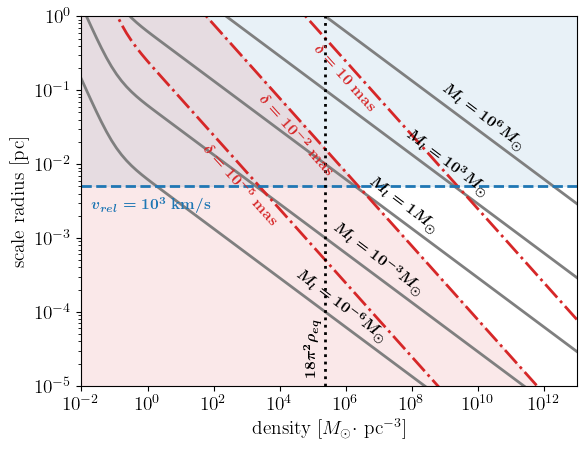

In [5]:
r_lim = 1000*1000*5*const.Julian_year/const.parsec
fac = 18
frac = 22

plt.plot(rho_ar, r_ar_h, label = '$M_l = 10^{3} M_\odot$', lw = 2, color = 'tab:grey')
plt.plot(rho_ar, r_ar_hh, label = '$M_l = 10^{3} M_\odot$', lw = 2, color = 'tab:grey')
plt.plot(rho_ar, r_ar_0, label = '$M_l = 1 M_\odot$', lw = 2, color = 'tab:grey')
plt.plot(rho_ar, r_ar_l, label = '$M_l = 10^{-3} M_\odot$', lw = 2, color = 'tab:grey')
plt.plot(rho_ar, r_ar_ll, label = '$M_l = 10^{-3} M_\odot$', lw = 2, color = 'tab:grey')

plt.plot(rho_ar, t_ar_0, linestyle = '-.',label = '$\delta = 10^{-2}$ mas', lw = 2, color = 'tab:red')
plt.plot(rho_ar, t_ar_l, linestyle = '-.',label = '$\delta = 10^{0}$ mas', lw = 2, color = 'tab:red')
plt.plot(rho_ar, t_ar_h, linestyle = '-.',label = '$\delta = 10^{0}$ mas', lw = 2, color = 'tab:red')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('density [$M_\odot\cdot$ pc$^{-3}$]')
plt.ylabel('scale radius [pc]')
plt.ylim(1e-5, 1e0)
plt.xlim(1e-2, 1e13)

plt.axhline(r_lim, color = 'tab:blue', linestyle = '--', lw = 2)

plt.fill_between(np.logspace(-5, 15,5), np.ones(5)*r_lim,np.ones(5)*1e2, alpha = .1, color = 'tab:blue')
plt.fill_between(rho_ar, np.zeros(len(rho_ar)), t_ar_0, alpha = .1, color = 'tab:red')
plt.axvline(2.3e5,  color = 'k', linestyle = 'dotted', lw =2)


plt.text(.8e9, 1e-1, r'$\boldsymbol{M_l = 10^6M_\odot}$', fontsize = 11, color = 'k', 
         rotation = -37, rotation_mode='anchor');
plt.text(.8e9/np.sqrt(9*fac), 1e-1/np.sqrt(fac), r'$\boldsymbol{M_l = 10^3M_\odot}$', fontsize = 11, color = 'k', 
         rotation = -37, rotation_mode='anchor');
plt.text(.8e9/9/fac, 1e-1/fac, r'$\boldsymbol{M_l = 1M_\odot}$', fontsize = 11, color = 'k', 
         rotation = -37, rotation_mode='anchor');
plt.text(.8e9/(9*fac)**(1.5), 1e-1/fac**(1.5), r'$\boldsymbol{M_l = 10^{-3}M_\odot}$', fontsize = 11, color = 'k', 
         rotation = -37, rotation_mode='anchor');
plt.text(.8e9/(9*fac)**2, 1e-1/fac**2, r'$\boldsymbol{M_l = 10^{-6}M_\odot}$', fontsize = 11, color = 'k', 
         rotation = -37, rotation_mode='anchor');


plt.text(1e5, 3.5e-1, r'$\boldsymbol{\delta = 10}$ \bf{mas}', fontsize = 11, color = 'tab:red', 
         rotation = -48, rotation_mode='anchor');
plt.text(1e5/np.sqrt(100*frac), 3.5e-1/np.sqrt(frac), r'$\boldsymbol{\delta = 10^{-2}}$ \bf{mas}', fontsize = 11, color = 'tab:red', 
         rotation = -48, rotation_mode='anchor');
plt.text(1e5/(100*frac), 3.5e-1/frac, r'$\boldsymbol{\delta = 10^{-5}}$ \bf{mas}', fontsize = 11, color = 'tab:red', 
         rotation = -48, rotation_mode='anchor');

plt.text(2e-2, 2.5e-3, r'$\boldsymbol{v_{rel} = 10^{3}}$ \bf{km/s}', fontsize = 11, color = 'tab:blue');
plt.text(1.3e5, 1.3e-5, r'$\boldsymbol{18\pi^2 \rho_{eq}}$', fontsize = 11, color = 'k', 
         rotation = 90, rotation_mode='anchor');
plt.savefig('substructure.pdf')